# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [3]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Database ini

In [4]:
SAMPLE = 'D059B6N3'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

# Import from origin

In [5]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


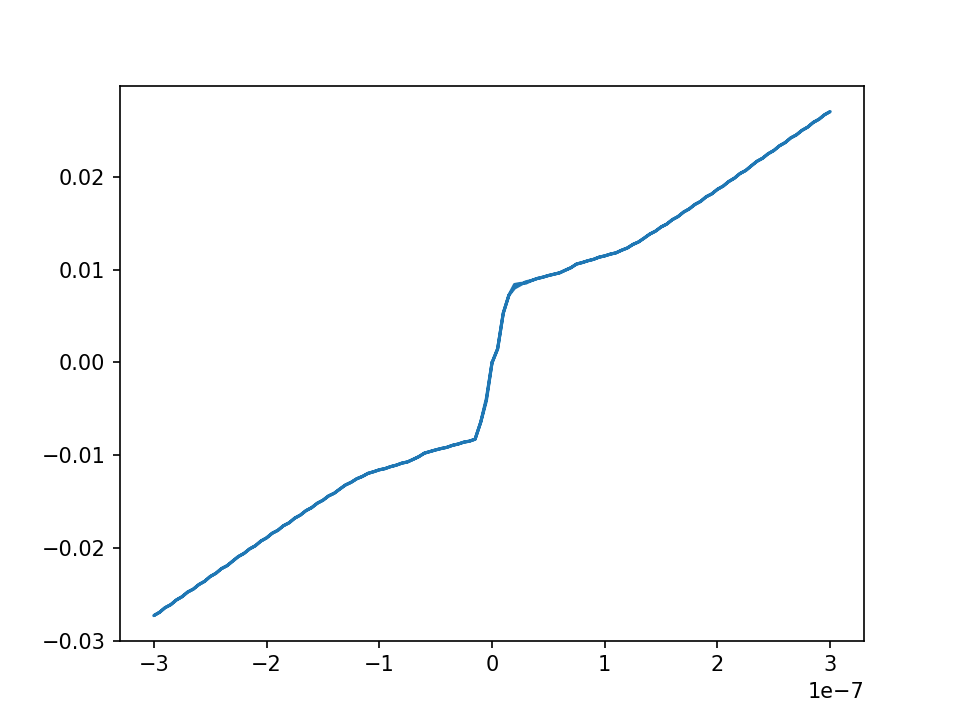

In [9]:
x, y = read_opj_data(cols = (4,5), preprint = True)

In [10]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC coarse')

Starting experimental run with id: 2


# Report

## Overview IVC

<IPython.core.display.Javascript object>


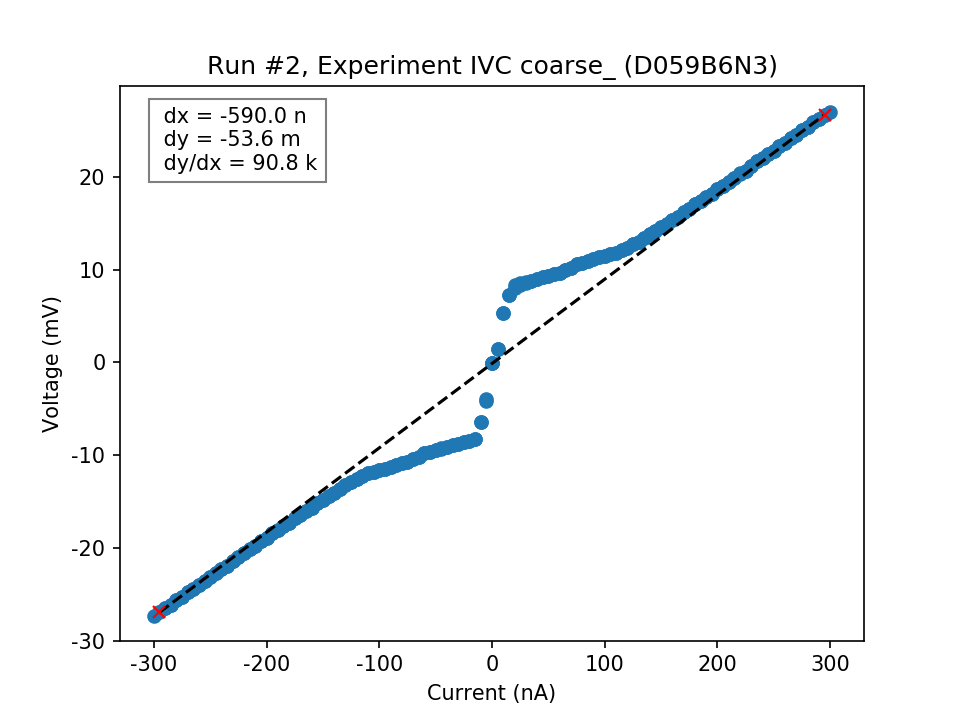

In [11]:
pbi(2, interactive = True)

In [12]:
Vg = 8.434e-3
Rn_tot = 90.8e3

## IVC fine scan

In [8]:
pbi(1, interactive = True)

<IPython.core.display.Javascript object>

AttributeError: Unknown property ls

In [13]:
Ro_tot = 72.6e3
Isw = 1.975e-9
N  = 30
Vo_tot = 195.5e-6

# Datatable update

In [14]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D059B6N3,40.0f,185.9m,1.6,67.4n,2.0n,20,2,4.2k,84.3k,3.9k,25.9M,78.8k,1.9m,Fin,fabd,1.5


In [15]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : Rn_tot,
               'Ro_tot'  : Ro_tot,
               'Isw'     : Isw,
               'N'       : N,
               'Vo_tot'  : Vo_tot,
               'Npar'    : 2,
               'dsgn'    : 'Fin',
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D059B6N3,40.0f,185.9m,2.2,93.9n,2.0n,30,2,3.0k,90.8k,2.4k,25.9M,72.6k,195.5u,Fin,measd_lv,1.8


In [16]:
ft.to_excel("..\chain table.xlsx")
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D059B6N3,40.0f,185.9m,2.2,93.9n,2.0n,30,2,3.0k,90.8k,2.4k,25.9M,72.6k,195.5u,Fin,measd_lv,1.8
